In [2]:
# Documentacion de la API de github https://developer.github.com/v3
# Se importan todas las librerias necesarias

import json # Manipular informacion
from datetime import datetime # Para convertir un string a fecha

from matplotlib import pyplot as plt # para graficar
import requests # Para conectarnos a la API

In [3]:
user = 'AndresC1982'          # Para crear un repo en esta cuenta
repo = 'Repositorio-Prueba'   # Nombre del repo a crear

userSearch = 'torvalds'       # Usuario para obtener datos
repoSearch = '/linux'         # Repositorio del que se obtendran los commits a analizar

token = 'ced0afb5a92b83614623c191d425dab815e1208c'  # Token de la API

headers = {'Authorization': 'token ' + token}       # Header para los requests

In [4]:
login = requests.get('https://api.github.com/user', headers=headers)   # Se loguea con el token especificado
login

<Response [200]>

In [5]:
# Crea el repositorio con un POST enviando un diccionario con la informacion del repositorio
descripcion = 'Repositorio creado con API'
repoData = {'name': repo, 'description': descripcion, 'auto_init': 'true'}
createRepo = requests.post('https://api.github.com/' + 'user/repos', headers=headers, data=json.dumps(repoData))
# json.dumps crea un json basado en un diccionario, ese diccionario es guardado en data y enviado a la API para crear el repositorio con dicha informacion
# Se crea el repositorio y puede ser verificado yendo a https://github.com/AndresC1982/Repositorio-Prueba
createRepo

<Response [201]>

In [6]:
# VERIFICAR EXISTENCIA DE REPOSITORIO ANTES DE EJECUTAR ESTA CELDA
# Elimina un repositorio con un DELETE con el usuario y nombre del repo
deleteRepo = requests.delete('https://api.github.com/' + 'repos/' + user + '/' + repo, headers=headers)
deleteRepo

<Response [204]>

In [7]:
# Obtiene los commits de cierto repositorio de cierto usuario
# El repositorio que esta siendo investigado es https://github.com/torvalds/linux
getRepoCommit = requests.get('https://api.github.com/' + 'repos/' + userSearch + repoSearch + '/commits', headers=headers)
commitsData = getRepoCommit.json()
commitsData

[{'sha': 'b3a9964cfa690150e49ae75ba16416ccaac3a8ba',
  'node_id': 'MDY6Q29tbWl0MjMyNTI5ODpiM2E5OTY0Y2ZhNjkwMTUwZTQ5YWU3NWJhMTY0MTZjY2FhYzNhOGJh',
  'commit': {'author': {'name': 'Linus Torvalds',
    'email': 'torvalds@linux-foundation.org',
    'date': '2019-09-07T18:48:28Z'},
   'committer': {'name': 'Linus Torvalds',
    'email': 'torvalds@linux-foundation.org',
    'date': '2019-09-07T18:48:28Z'},
   'message': 'Merge tag \'char-misc-5.3-rc8\' of git://git.kernel.org/pub/scm/linux/kernel/git/gregkh/char-misc\n\nPull Documentation updates from Greg KH:\n "A few small patches for the documenation file that came in through the\n  char-misc tree in -rc7 for your tree.\n\n  They fix the mistake in the .rst format that kept the table of\n  companies from showing up in the html output, and most importantly,\n  add people\'s names to the list showing support for our process"\n\n* tag \'char-misc-5.3-rc8\' of git://git.kernel.org/pub/scm/linux/kernel/git/gregkh/char-misc:\n  Documentation/p

In [8]:
# Se obtiene data de cada commit, modificaciones totales y fechas
dateCommitDataDict = {}
# Se itera sobre los primero 200 items del diccionario "commitsData"
for c in commitsData[:200]:
    # Se obtiene un commit especifico
    getCommitData = requests.get('https://api.github.com/' + 'repos/' + userSearch + repoSearch + '/commits/' + c['sha'], headers=headers)
    commitDataJson = getCommitData.json()

    dateString = commitDataJson['commit']['author']['date']
    dateTimeObject = datetime.strptime(dateString, "%Y-%m-%dT%H:%M:%SZ") # Se transforma en un objeto datetime (fecha de python)
    
    shortDateStr = dateTimeObject.strftime("%d/%m/%Y") # Se formatea la fecha a un formato mas entendible

    if shortDateStr in dateCommitDataDict: # Si la fecha existe en el diccionario se agrega la data del commit
        dateCommitDataDict[shortDateStr].append(commitDataJson["stats"])
    else:                                  # Si no existe se crea la lista con la data del commit
        dateCommitDataDict[shortDateStr] = [commitDataJson["stats"]]

dateCommitDataDict

{'07/09/2019': [{'total': 14, 'additions': 7, 'deletions': 7},
  {'total': 46, 'additions': 33, 'deletions': 13}],
 '06/09/2019': [{'total': 2, 'additions': 1, 'deletions': 1},
  {'total': 4, 'additions': 2, 'deletions': 2},
  {'total': 5, 'additions': 4, 'deletions': 1},
  {'total': 2, 'additions': 1, 'deletions': 1},
  {'total': 2, 'additions': 1, 'deletions': 1},
  {'total': 13, 'additions': 10, 'deletions': 3},
  {'total': 432, 'additions': 257, 'deletions': 175},
  {'total': 134, 'additions': 103, 'deletions': 31},
  {'total': 2, 'additions': 1, 'deletions': 1},
  {'total': 216, 'additions': 202, 'deletions': 14},
  {'total': 579, 'additions': 17, 'deletions': 562},
  {'total': 22, 'additions': 4, 'deletions': 18},
  {'total': 2, 'additions': 1, 'deletions': 1},
  {'total': 16, 'additions': 11, 'deletions': 5},
  {'total': 196, 'additions': 187, 'deletions': 9},
  {'total': 8, 'additions': 3, 'deletions': 5}],
 '05/09/2019': [{'total': 6, 'additions': 6, 'deletions': 0},
  {'total

In [9]:
# Se limpia la lista de fechas y modificaciones
dates = [d for d in dateCommitDataDict]
totalModsByDate = []
for date in dateCommitDataDict:
    total = 0
    for t in dateCommitDataDict[date]:
        total = total + t["total"]
    totalModsByDate.append(total)

print("Antes de ordenar")
print(dates)
print(totalModsByDate)

# Se ordenan las modificaciones por fecha (un diccionario no es ordenado)
lista = [i for i in zip(dates, totalModsByDate)] # En esta lista aparecen pares ordenados de fecha y total, ejemplo [(fecha, total), ...]
# Se pasa la fecha de un string a un objeto datetime para poder compararlo con otras fechas (fecha de python)
lista.sort(key=lambda x: datetime.strptime(x[0], "%d/%m/%Y")) # Se ordena la lista de fechas y totales y especificamos con un lambda cual es el criterio por el cual ordenaremos, en este caso en base a la fecha para que este en orden cronologico

dates, totalModsByDate = list(zip(*lista)) # Separa las fechas de los totales

print("Luego de ordenar")
print(dates)
print(totalModsByDate)

Antes de ordenar
['07/09/2019', '06/09/2019', '05/09/2019', '02/09/2019', '15/08/2019', '04/09/2019', '31/08/2019']
[60, 1635, 169, 6, 8, 10, 98]
Luego de ordenar
('15/08/2019', '31/08/2019', '02/09/2019', '04/09/2019', '05/09/2019', '06/09/2019', '07/09/2019')
(8, 98, 6, 10, 169, 1635, 60)


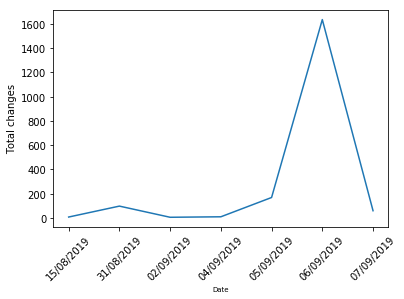

In [10]:
plt.plot(dates, totalModsByDate)
plt.xlabel("Date", fontsize=7)
plt.ylabel("Total changes")
plt.xticks(rotation=45)
plt.show()